In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [11]:
def imshow(title='', image=None, size=10):
    """
    نمایش یک تصویر با عنوان و اندازه قابل تنظیم
    
    Args:
        title (str): عنوان تصویر
        image (numpy.ndarray): تصویر ورودی
        size (int): اندازه نمایش
    """
    if image is None:
        print("تصویر ورودی نمی‌تواند None باشد")
        return
    
    W, H = image.shape[:2]
    aspect_ratio = H / W
    plt.figure(figsize=(aspect_ratio * size, size))
    
    # تبدیل BGR به RGB برای نمایش صحیح
    if len(image.shape) == 3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()


In [12]:
image_path = "Bird Speciees Dataset/BARN OWL/001.jpg"
image = cv.imread(image_path, cv.IMREAD_COLOR)

if image is None:
    print(f"خطا: نمی‌توان تصویر را از مسیر {image_path} خواند")
    # برای تست، یک تصویر نمونه ایجاد می‌کنیم
    image = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)

print(f"ابعاد تصویر: {image.shape}")
print(f"نوع داده: {image.dtype}")

ابعاد تصویر: (224, 224, 3)
نوع داده: uint8


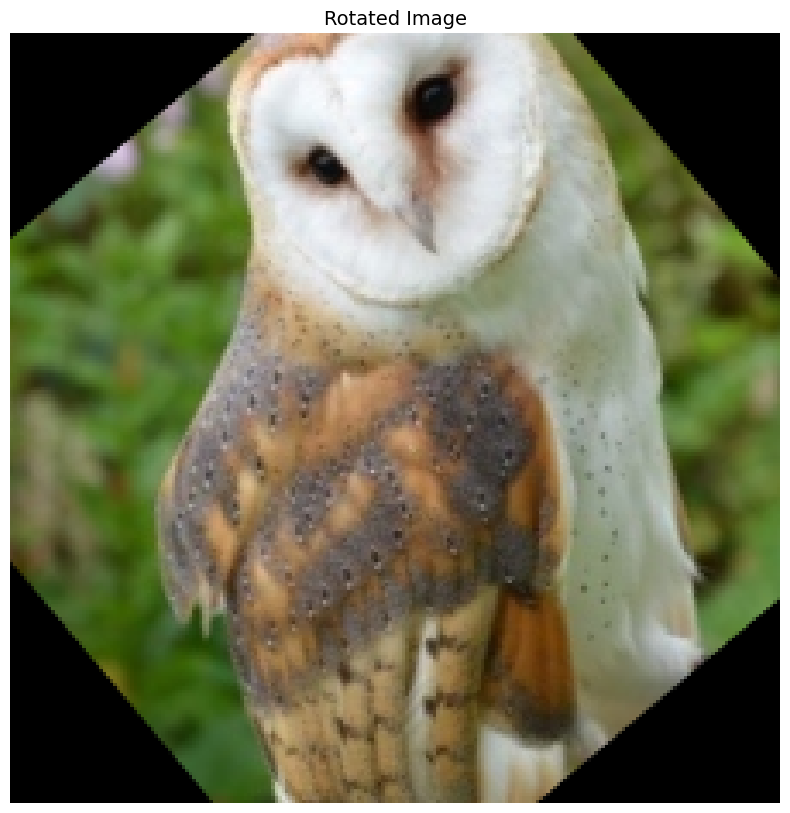

In [13]:
h, w = image.shape[:2]
mat = cv.getRotationMatrix2D((h/2, w/2), 40, 1)
rotated_image = cv.warpAffine(image, mat, (w, h))
imshow("Rotated Image", rotated_image)

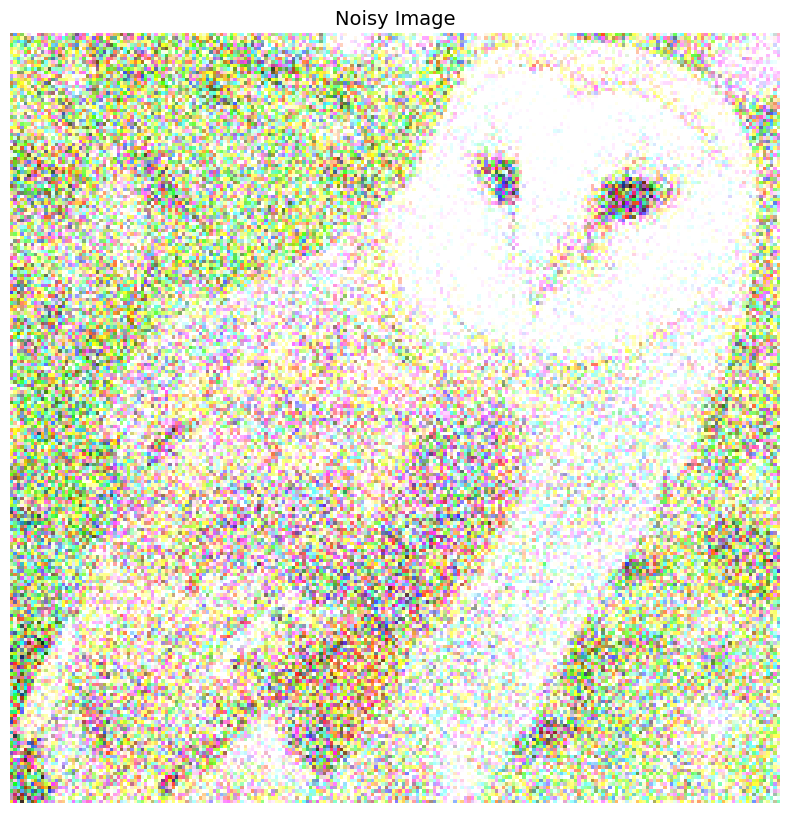

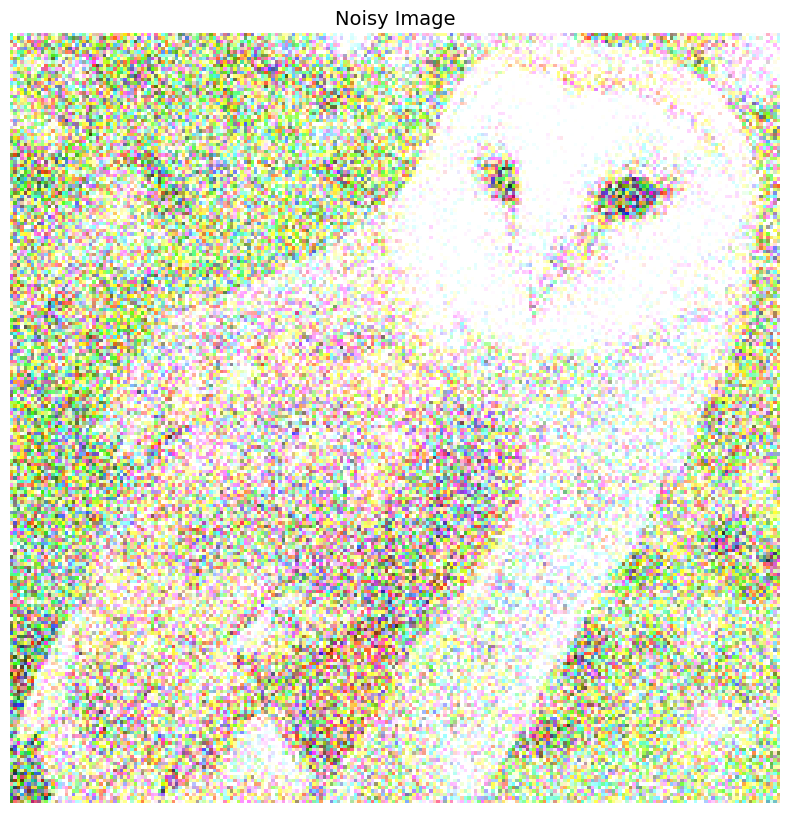

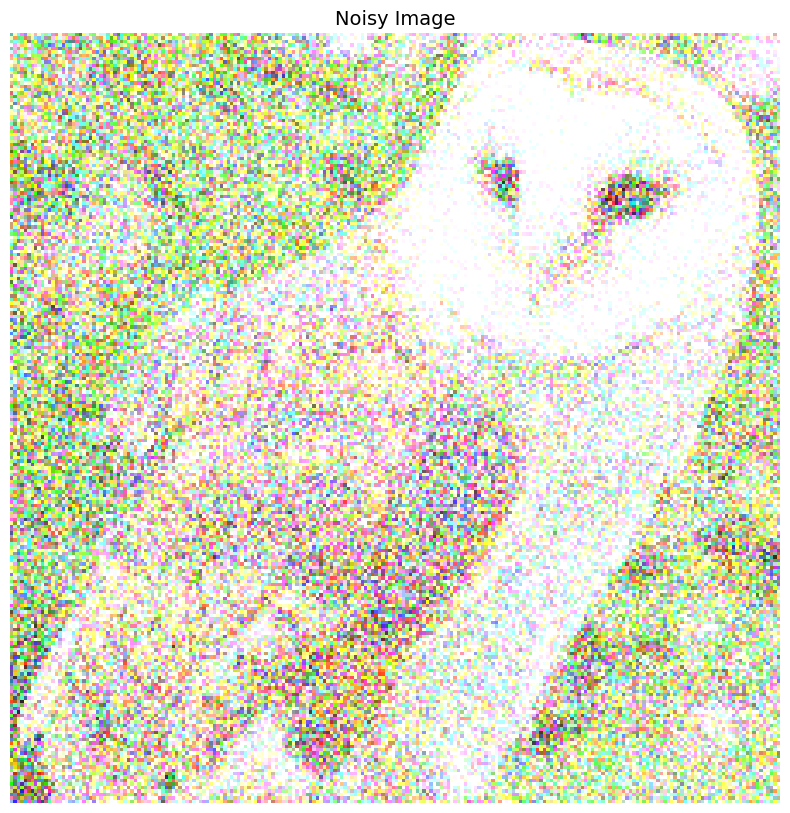

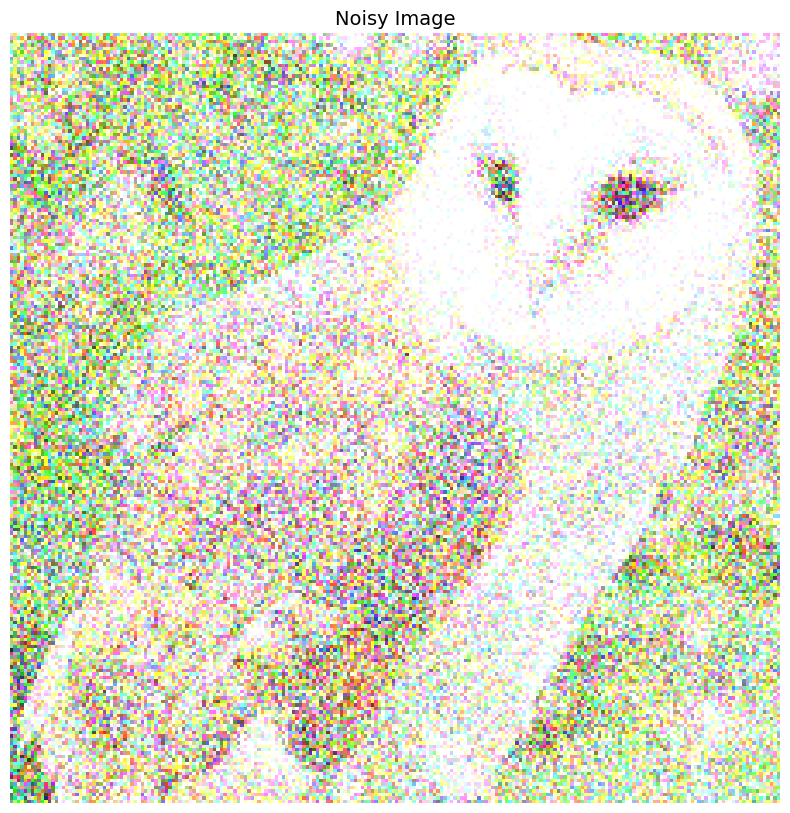

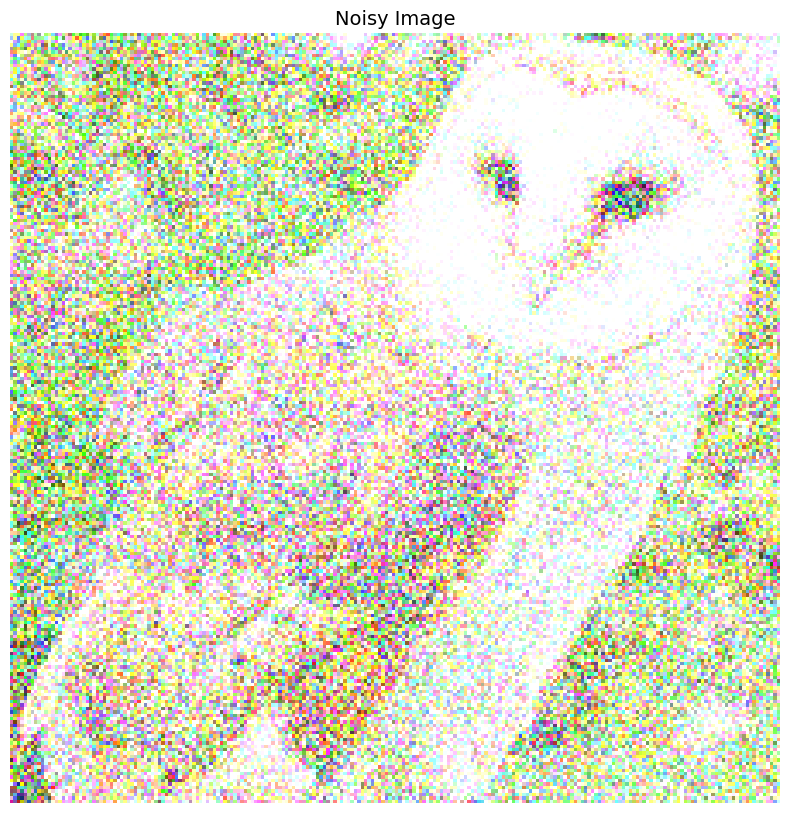

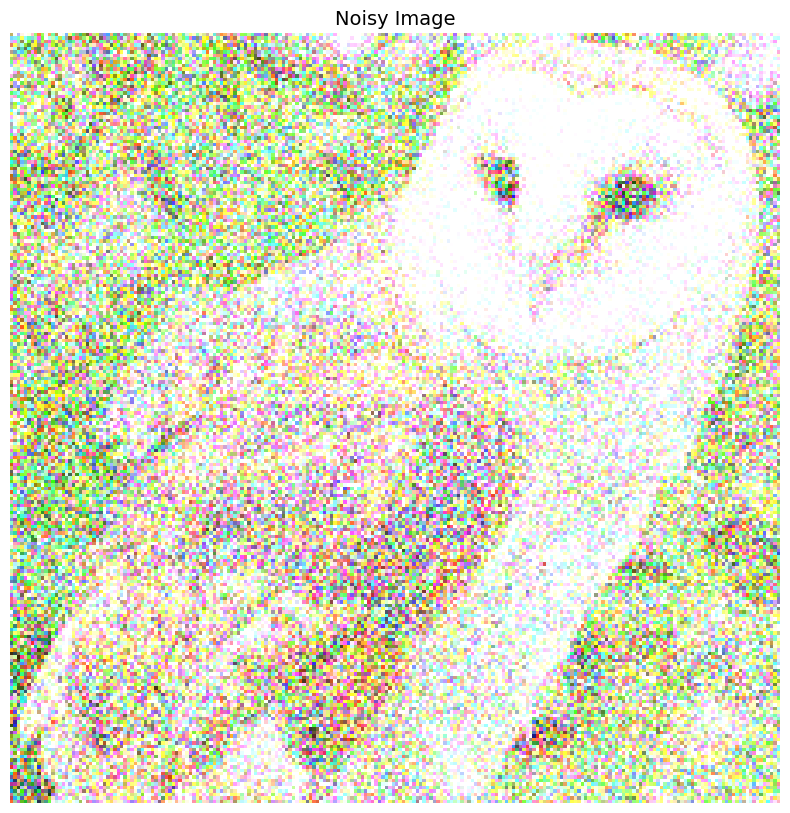

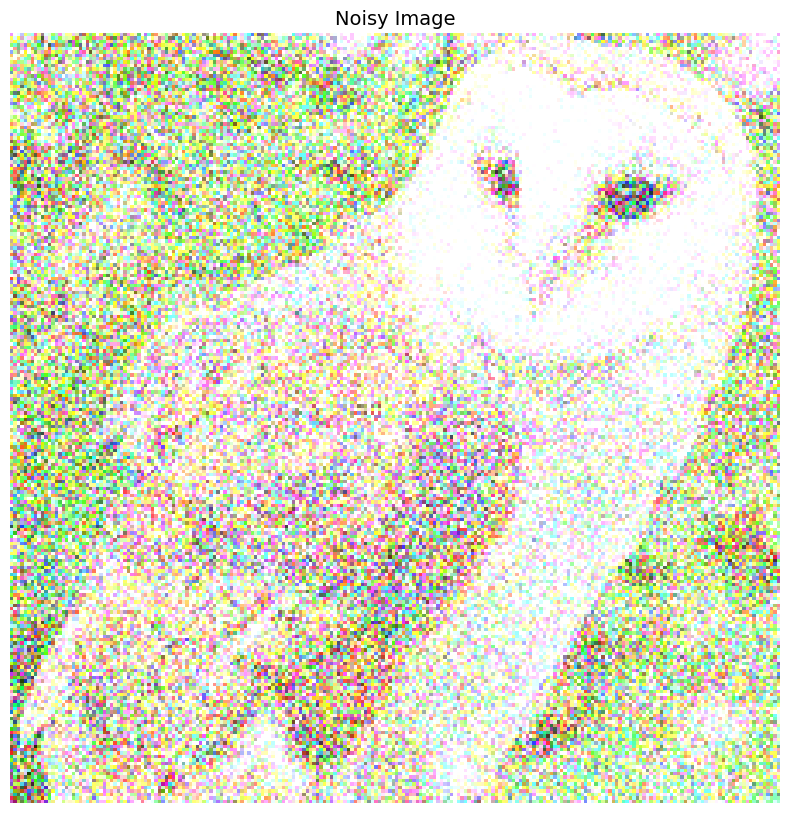

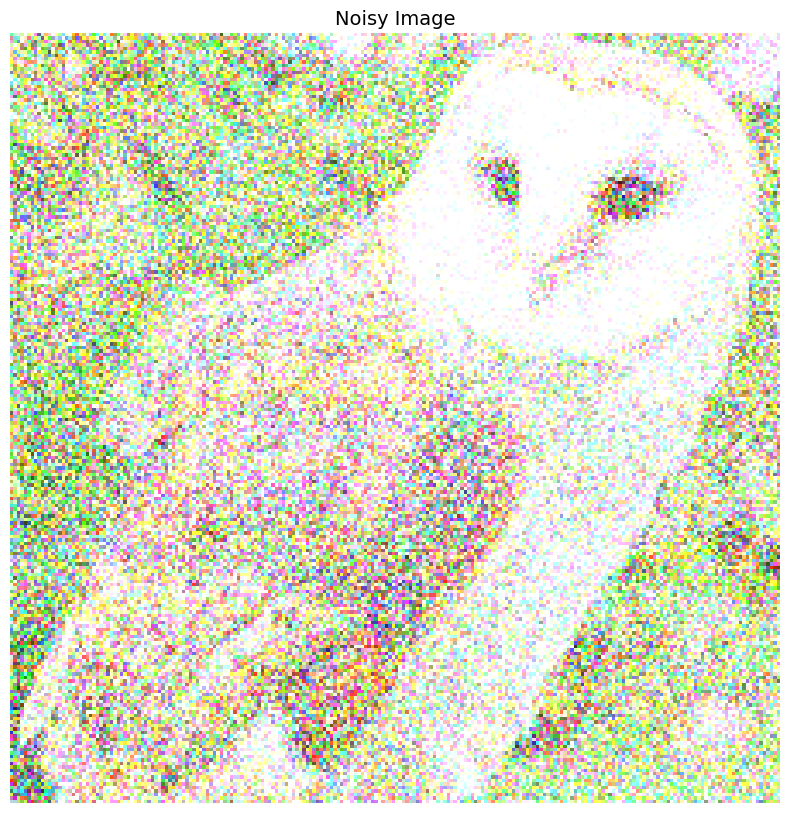

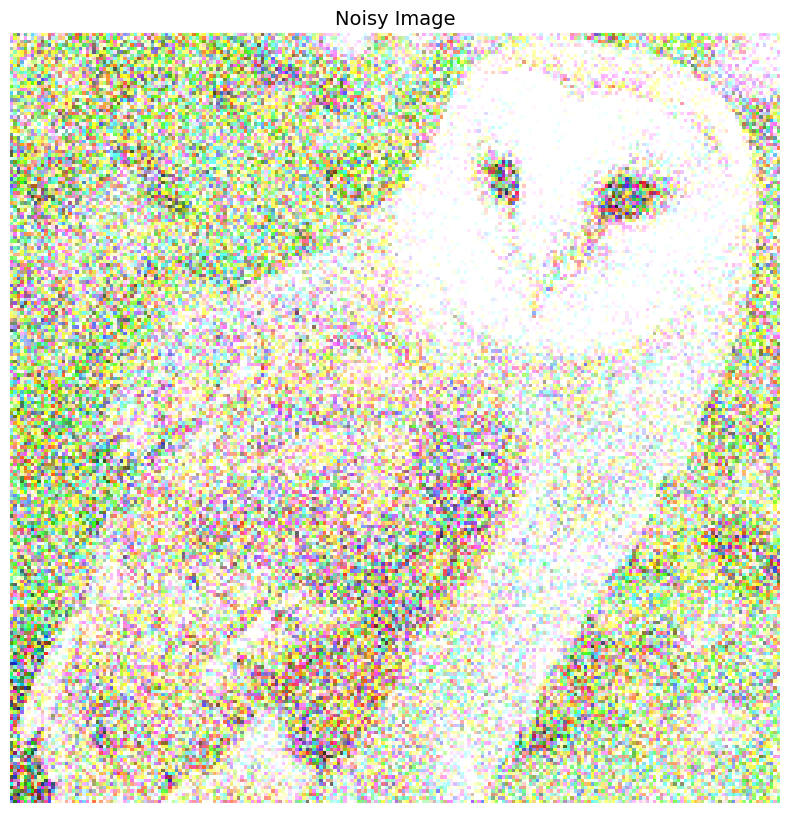

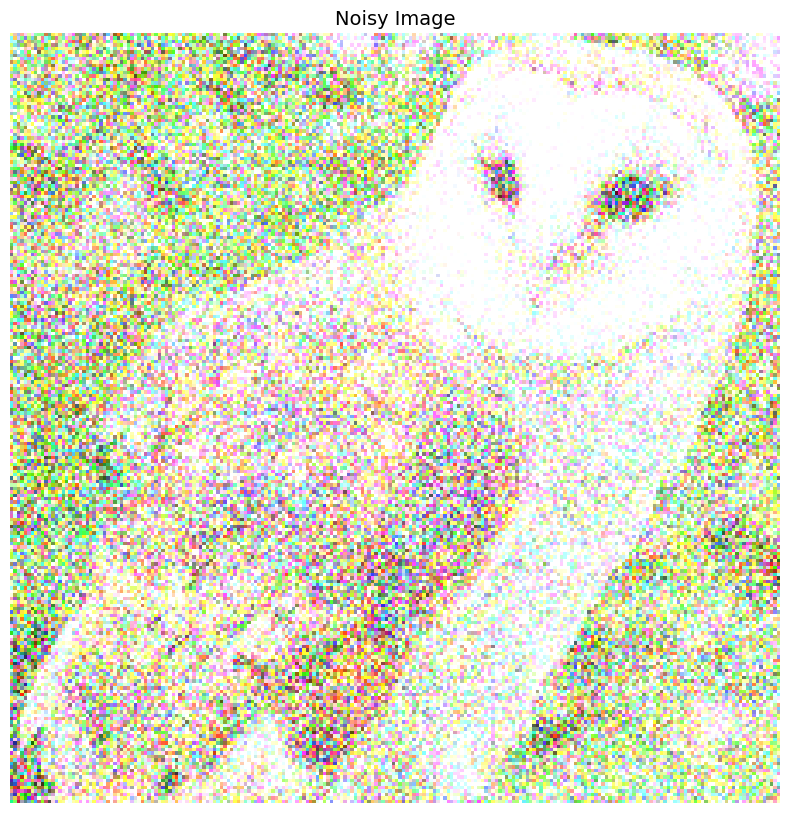

In [14]:
images = []
for i in range(10):
    mat_noise = np.random.randint(0,255,(image.shape),dtype=np.uint8)
    noisy_image = cv.add(image, mat_noise)
    # noisy_image = np.clip(noisy_image, 0, 255)
    images.append(noisy_image)
    imshow("Noisy Image", noisy_image)

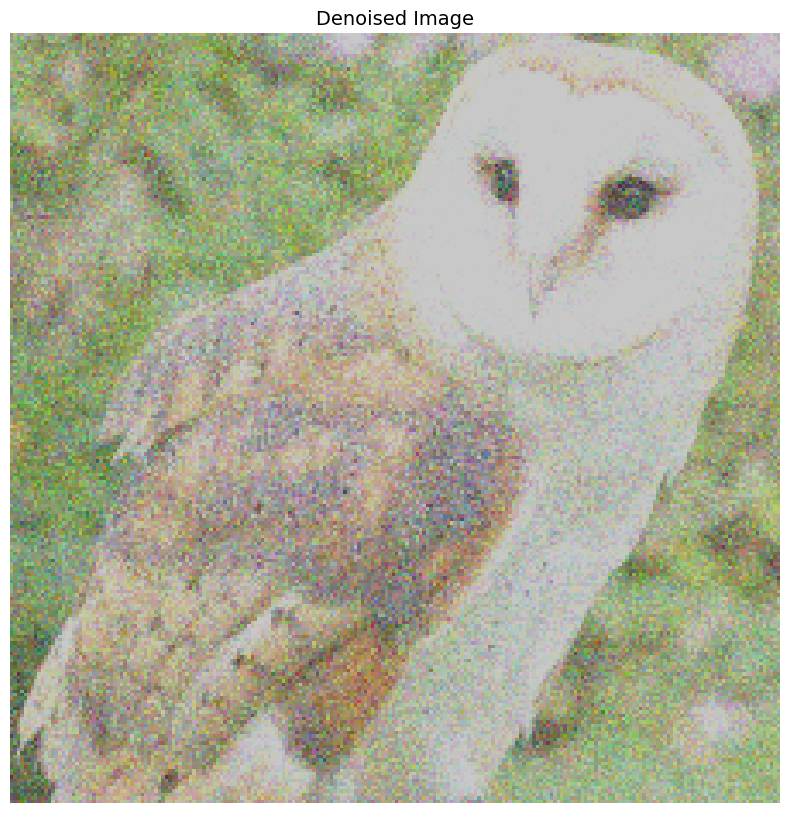

In [15]:
images_array = np.stack(images, axis=0).astype(np.float32)

denoised_image = np.zeros_like(image, dtype=np.uint8)

H, W, C = image.shape

for h in range(H):
    for w in range(W):
        for c in range(C):
            values = images_array[:, h, w, c]  # مقادیر 10تا تصویر برای یک پیکسل
            q1 = np.percentile(values, 25)
            q3 = np.percentile(values, 75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            filtered_values = values[(values >= lower) & (values <= upper)]
            mean_val = np.mean(filtered_values)
            denoised_image[h, w, c] = np.clip(mean_val, 0, 255)

imshow("Denoised Image", cv.convertScaleAbs(denoised_image,None,0.9,-30))


In [16]:
mean_image = np.mean(images_array, axis=0)
mean_image_uint8 = mean_image.astype(np.uint8)

cv.imshow("Mean Image", mean_image_uint8)

denoised_image1 = cv.convertScaleAbs(mean_image, alpha=0.9, beta=-30)
cv.imshow("Denoised Image", denoised_image1)

cv.waitKey(0)
cv.destroyAllWindows()
